# QuTiP example: Landau-Zener-Stuckelberg interferometry

J.R. Johansson and P.D. Nation

For more information about QuTiP see [http://qutip.org](http://qutip.org)

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
from qutip import *
from qutip.ui.progressbar import TextProgressBar as ProgressBar

Landau-Zener-Stuckelberg interferometry: Steady state of a strongly driven two-level system, using the one-period propagator. 

In [5]:
# set up the parameters and start calculation
delta  = 1.0  * 2 * np.pi  # qubit sigma_x coefficient
w      = 2.0  * 2 * np.pi  # driving frequency
T      = 2 * np.pi / w     # driving period 
gamma1 = 0.00001        # relaxation rate
gamma2 = 0.005          # dephasing  rate

eps_list = np.linspace(-20.0, 20.0, 101) * 2 * np.pi
A_list   = np.linspace(  0.0, 20.0, 101) * 2 * np.pi

# pre-calculate the necessary operators
sx = sigmax(); sz = sigmaz(); sm = destroy(2); sn = num(2)

# collapse operators
c_op_list = [np.sqrt(gamma1) * sm, np.sqrt(gamma2) * sz]  # relaxation and dephasing

In [6]:
# ODE settings (for list-str format)
options = Options()
options.atol = 1e-6 # reduce accuracy to speed
options.rtol = 1e-5 # up the calculation a bit
options.rhs_reuse = True # Compile Hamiltonian only the first time.

In [7]:
# perform the calculation for each combination of eps and A, store the result
# in a matrix
def calculate():

    p_mat = np.zeros((len(eps_list), len(A_list)))
    
    H0 = - delta/2.0 * sx 
    
    # Define H1 (first time-dependent term)
    # String method:
    H1 = [- sz / 2, 'eps']
    # Function method:
    # H1 = [- sz / 2, lambda t, args: args['eps'] ]
    
    # Define H2 (second time-dependent term)
    # String method:
    H2 = [sz / 2, 'A * sin(w * t)']
    # Function method:
    # H2 = [sz / 2, lambda t, args: args['A']*np.sin(args['w'] * t) ]
    
    H = [H0, H1, H2]
    
    pbar = ProgressBar(len(eps_list))
    for m, eps in enumerate(eps_list):
        pbar.update(m)
        for n, A in enumerate(A_list):
            args = {'w': w, 'A': A, 'eps': eps}

            U = propagator(H, T, c_op_list, args, options=options)
            rho_ss = propagator_steadystate(U)

            p_mat[m,n] = np.real(expect(sn, rho_ss))

    return p_mat

In [8]:
p_mat = calculate()

10.9%. Run time:  10.91s. Est. time left: 00:00:01:29
20.8%. Run time:  19.61s. Est. time left: 00:00:01:14
30.7%. Run time:  27.71s. Est. time left: 00:00:01:02
40.6%. Run time:  34.97s. Est. time left: 00:00:00:51
50.5%. Run time:  41.99s. Est. time left: 00:00:00:41
60.4%. Run time:  49.02s. Est. time left: 00:00:00:32
70.3%. Run time:  55.84s. Est. time left: 00:00:00:23
80.2%. Run time:  63.31s. Est. time left: 00:00:00:15
90.1%. Run time:  71.95s. Est. time left: 00:00:00:07


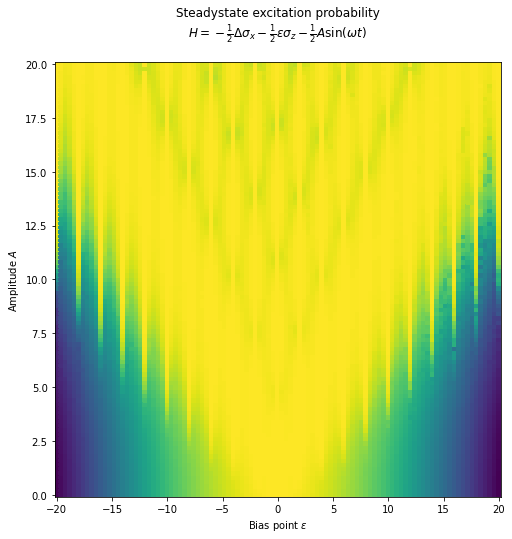

In [9]:
fig, ax = plt.subplots(figsize=(8, 8))

A_mat, eps_mat = np.meshgrid(A_list/(2*np.pi), eps_list/(2*np.pi))

ax.pcolor(eps_mat, A_mat, p_mat, shading='auto')
ax.set_xlabel(r'Bias point $\epsilon$')
ax.set_ylabel(r'Amplitude $A$')
ax.set_title("Steadystate excitation probability\n" +
             r'$H = -\frac{1}{2}\Delta\sigma_x -\frac{1}{2}\epsilon\sigma_z - \frac{1}{2}A\sin(\omega t)$' + "\n");

## Versions

In [11]:
from qutip.ipynbtools import version_table

version_table()

Software,Version
QuTiP,4.6.2
Numpy,1.21.4
SciPy,1.7.2
matplotlib,3.4.3
Cython,0.29.24
Number of CPUs,4
BLAS Info,OPENBLAS
IPython,7.29.0
Python,"3.9.5 (default, May 11 2021, 08:20:37) [GCC 10.3.0]"
OS,posix [linux]
